##Word2Vec Practical Implementation

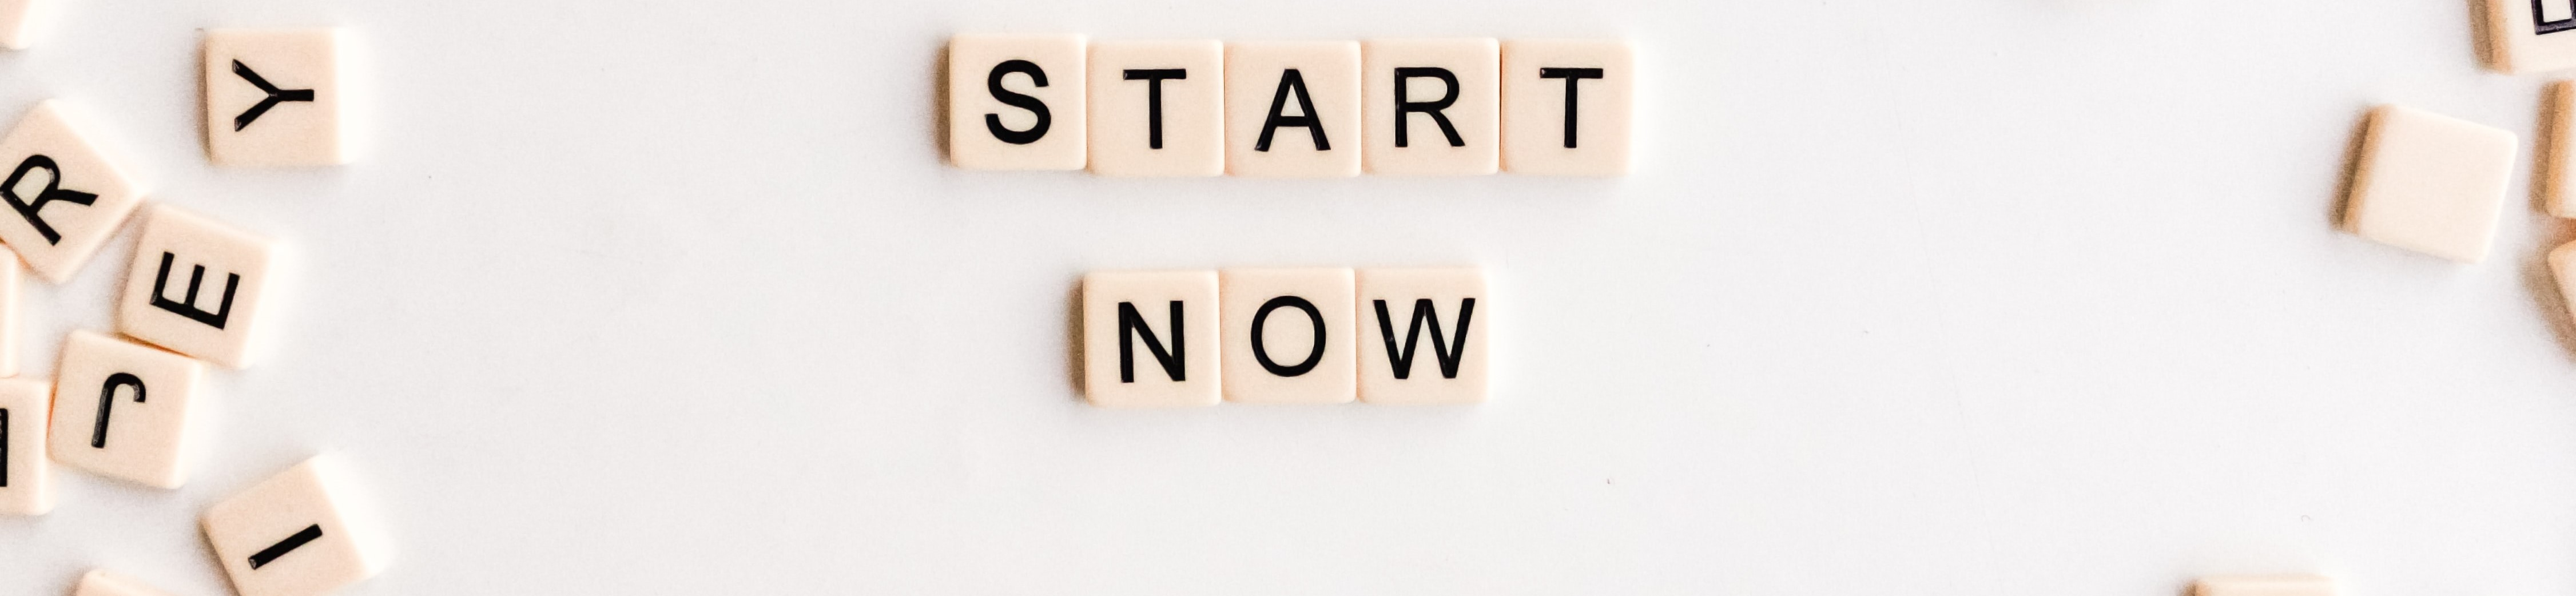



In this notebook, we will create a vector representation of words using a corpus (Popular TV Show 'Friends' script). The aim is to train a gensim model to represent each unique word in the corpus as a vector of shape (100,). We will also use a dimentionality reduction technique to visualize the final outcome and make conclusions.

## Installing the required Libraries

In [1]:
!pip install opendatasets --q
import opendatasets as od
import os

import gensim
from gensim.utils import simple_preprocess

import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords

import numpy as np
from sklearn.decomposition import PCA

import plotly.express as px

## Downloading the data (the Script) from Kaggle.

In this section we will download the TV show's script from Kaggle and save it on our google collab instance.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/blessondensil294/friends-tv-series-screenplay-script'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sarthaksrivastava123
Your Kaggle Key: ··········


100%|██████████| 1.92M/1.92M [00:00<00:00, 107MB/s]

## Preparing and Pre-Processing the data

We will start by appedning all the .txt files (a total of 228 files) representing differenet episodes into a single string called script. This will be followed by some pre-processing.

In [3]:
script = ''

for filename in os.listdir('/content/friends-tv-series-screenplay-script'):

  f = open('/content/friends-tv-series-screenplay-script/'+filename)
  script = script + f.read()
  print(f" {filename} sucessfully appended ")


 S04E02 The Cat.txt sucessfully appended 
 S08E12 Joey Dates Rachel.txt sucessfully appended 
 S07E21 The Vows.txt sucessfully appended 
 S08E16 Joey Tells Rachel.txt sucessfully appended 
 S09E01 No One Proposes.txt sucessfully appended 
 S04E01 The Jellyfish.txt sucessfully appended 
 S01E20 The Evil Orthodontist.txt sucessfully appended 
 S10E02 Ross Is Fine.txt sucessfully appended 
 S05E07 Ross Moves In.txt sucessfully appended 
 S04E16 The Fake Party.txt sucessfully appended 
 S02E11 The Lesbian Wedding.txt sucessfully appended 
 S03E14 Phoebes Ex-Partner.txt sucessfully appended 
 S02E18 Dr. Ramoray Dies.txt sucessfully appended 
 S06E23 The Ring.txt sucessfully appended 
 S07E08 Chandler Doesnt Like Dogs.txt sucessfully appended 
 S03E01 The Princess Leia Fantasy.txt sucessfully appended 
 S01E11 Mrs. Bing.txt sucessfully appended 
 S08E09 The Rumor.txt sucessfully appended 
 S06E10 The Routine.txt sucessfully appended 
 S03E08 The Giant Poking Device.txt sucessfully appended 


In [4]:
len(script)

4933030

### Tokenization, lowercasing, puntuation removal, stop words removal.

Now our entire corpus has 4933030 characters. We will apply some preprocessing, using gensim.utils.simple_preprocess() function, which will do the following:
- Tokenization
- Lowercase the entire string
- Remove punctuations
- split words


In [ ]:
nltk.download('punkt') #Required for tokenization
nltk.download('stopwords') #Required for stopwords list

script_tokenized = sent_tokenize(script)
script_tokenized[5] #Checking a sample

final_output = []

for s in script_tokenized:
   out = simple_preprocess(s)
   final = [w for w in out if w not in stopwords.words('english')]
   final_output.append(final)



In [7]:
len(final_output)


115943

As evident from above result, all the stop words are removed, the final output is a list of lists, each list contaning one sentence at a time without any stopwords or puntuation. The total number of sentences is 1,15,943. Next step is to train out model.

## Model Training

In [8]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count=2 )

In [9]:
model.build_vocab(final_output)

In [10]:
model.train(final_output, total_examples=model.corpus_count, epochs=5)

(1806211, 2344670)

## Results and Conclusions:

The following results will make sense only if you have watched the Friends series.

1. Picking the odd one out from monica, chandler, ross, raechel, janice and phoebe. Well we all know the answer.

In [12]:
model.wv.doesnt_match(['monica','chandler','ross','rachel','janice','phoebe'])

'janice'

In [19]:
model.wv.doesnt_match(['monica','chandler','joey','gunther'])

'gunther'

2. Checking similarity score between the couple chandler and monica and comparing that to chandler and janice.

In [14]:
model.wv.similarity('chandler','monica')

0.90661746

In [15]:
model.wv.similarity('chandler', 'janice')

0.79115796

3. Raechel works at a fashion brand by the name of Ralph Lauren, hence when we check the words most similar to ralph we get the following:
- lauren
- selling
- costume

This makes perfect sense.

In [16]:
model.wv.most_similar('ralph')

[('lauren', 0.9868400692939758),
 ('selling', 0.9846187829971313),
 ('costume', 0.9826328158378601),
 ('co', 0.981797456741333),
 ('museum', 0.9812635779380798),
 ('blades', 0.9812443256378174),
 ('atm', 0.9810296893119812),
 ('filing', 0.9806045889854431),
 ('cassie', 0.9798776507377625),
 ('roller', 0.9797298908233643)]

In [18]:
model.wv.most_similar('monica')

[('rachel', 0.9313547611236572),
 ('chandler', 0.9066175222396851),
 ('restaurant', 0.8932672142982483),
 ('everyone', 0.889369547367096),
 ('phoebe', 0.8889174461364746),
 ('janine', 0.8795130252838135),
 ('airport', 0.8791434168815613),
 ('still', 0.8769449591636658),
 ('ross', 0.8741522431373596),
 ('ease', 0.8713415265083313)]

## Performing dimentionality reduction and observing the 3D-plot.

In the above example, each word has been represented as a vector of shape 100. For example:

In [28]:
print(model.wv['chandler'].shape)
print(model.wv.get_normed_vectors().shape)

# model.wv.get_normed_vectors(): This will give all the vectors.
# model.wv.index_to_key(): This will give a list of all words, corresponding to the above vectors.

y = model.wv.index_to_key

(100,)
(10411, 100)


We will use dimentionality reduction technique and observe these points in 3D space bringing it down from 100 to 3 using PCA.

In [36]:
pca = PCA(n_components = 3)

X = pca.fit_transform(model.wv.get_normed_vectors())

X[:5]

array([[0.14457013, 0.21007732, 0.11085314],
       [0.23359871, 0.37483847, 0.17264321],
       [0.21309806, 0.2156059 , 0.18204263],
       [0.19923358, 0.19417593, 0.16445458],
       [0.21387823, 0.28575873, 0.17132139]], dtype=float32)

As clear from the above result, the 100 dimention vector has been reduced to 3 using PCA. Next, lets plot this on a graph.

In [40]:
fig = px.scatter_3d(X[:150], x=0,y=1,z=2, color = y[:150])
fig.show()

In the above 3D plot we can see that similar words, or words sharing a similar context are plotted nearby.